<a href="https://colab.research.google.com/github/RachmaAyudyaw/MachineLearningDicodingGoogleResearchCollab/blob/main/LatihanCNN_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-10-20 23:19:48--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  1.93MB/s    in 39s     

2020-10-20 23:20:28 (1.71 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [36]:
#melakukan ekstraksi pada file zip
import zipfile,os
local_zip='/tmp/messy_vs_clean_room.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir='/tmp/images'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'val')

In [37]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [38]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [39]:
#membuat direktori ruangan rapi pada direktori data training
train_clean_dir=os.path.join(train_dir,'clean')

#membuat direktori ruangan berantakan pada direktori data training
train_messy_dir=os.path.join(train_dir,'messy')

#membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir=os.path.join(validation_dir,'clean')

#membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir=os.path.join(validation_dir,'messy')

In [40]:
#membuat objek ImageDataGenerator untuk data training dan data testing. 
#beberapa kemudahan yg disediakan image data generator adalah preprocessing data,
#pelabelan sampel otomatis dan augmentasi gambar.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range=0.2,
                fill_mode='nearest'
              )

test_datagen=ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range=0.2,
                fill_mode='nearest'
              )

In [41]:
#lalu kita dapat menggunakan objek image data generator sebelumnya untuk
#mempersiapkan data latih yang akan dipelajari oleh model
train_generator=train_datagen.flow_from_directory(
    train_dir,#direktori data latih
    target_size=(150,150), #mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    #karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode='binary'
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory(
    validation_dir, #direktori data validasi
    target_size=(150,150), #mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    #karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode='binary'
    class_mode='binary'
)



Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [42]:
#membangun CNN 
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [43]:
#compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [44]:
#latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  #berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.7631 - accuracy: 0.4800 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6924 - accuracy: 0.5100 - val_loss: 0.6821 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6752 - accuracy: 0.5500 - val_loss: 0.6143 - val_accuracy: 0.7000
Epoch 4/20
25/25 - 6s - loss: 0.6586 - accuracy: 0.7000 - val_loss: 0.9862 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 6s - loss: 0.6585 - accuracy: 0.6400 - val_loss: 0.6457 - val_accuracy: 0.6500
Epoch 6/20
25/25 - 6s - loss: 0.6797 - accuracy: 0.6200 - val_loss: 0.7061 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 6s - loss: 0.6765 - accuracy: 0.5500 - val_loss: 0.6312 - val_accuracy: 0.6000
Epoch 8/20
25/25 - 6s - loss: 0.6387 - accuracy: 0.7100 - val_loss: 0.6084 - val_accuracy: 0.8500
Epoch 9/20
25/25 - 6s - loss: 0.6450 - accuracy: 0.7300 - val_loss: 0.5998 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 6s - loss: 0.5639 - accuracy: 0.7500 - val_loss: 0.4932 - val_accuracy: 0.7000
Epoch 11/20
25/25 -

Saving Snapshot_20201021.JPG to Snapshot_20201021.JPG
Snapshot_20201021.JPG
clean


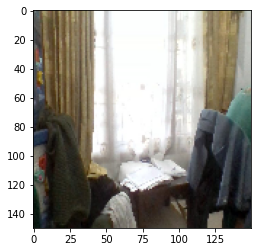

In [46]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path=fn
  img=image.load_img(path,target_size=(150,150))
  imgplot=plt.imshow(img)
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)

  print(fn)
  if(classes==0):
    print('clean')
  else:
    print('messy')